In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/USA/LC/X_train.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,14400.0,60 months,12.49,323.90,B,7 years,MORTGAGE,40000.0,Not Verified,debt_consolidation,OH,16.08,0.0,770.0,0.0,13.0,0.0,7771.0,13.8,30.0
1,9600.0,36 months,13.99,328.06,C,6 years,RENT,60000.0,Verified,debt_consolidation,NC,16.54,0.0,675.0,1.0,12.0,0.0,10965.0,87.7,31.0
2,11500.0,60 months,15.61,277.29,C,10+ years,RENT,34000.0,Source Verified,debt_consolidation,CA,17.08,0.0,685.0,0.0,7.0,0.0,9321.0,48.8,8.0
3,10000.0,36 months,11.49,329.72,B,10+ years,MORTGAGE,49000.0,Source Verified,credit_card,NC,13.92,1.0,680.0,1.0,9.0,0.0,5984.0,48.3,34.0
4,3500.0,36 months,19.03,128.35,D,10+ years,MORTGAGE,40000.0,Source Verified,debt_consolidation,GA,24.33,0.0,660.0,0.0,7.0,1.0,9254.0,54.1,16.0


In [4]:
X = df[[x for x in df.columns if x != 'fico_range_low']]
y= df.fico_range_low

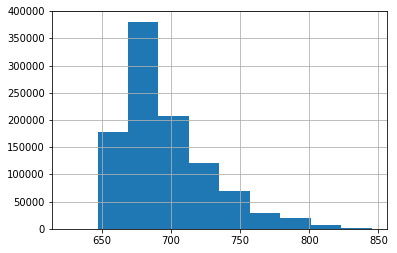

In [7]:
y.hist()